In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt

In [2]:
trainingdata = torchvision . datasets. FashionMNIST ('./FashionMNIST/', train=True ,download=True , transform = torchvision . transforms . ToTensor ())
testdata = torchvision .datasets. FashionMNIST ('./FashionMNIST/', train=False ,download=True , transform = torchvision . transforms . ToTensor ())

In [3]:
print(len(trainingdata)) #Training data length
print(len(testdata)) #Testing data length

60000
10000


In [4]:
trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=64,shuffle=True) #Making it iterable
testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=False)
images, labels = next(iter(trainDataLoader))
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [5]:
class Model(torch.nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(784, 256) #764 inputs and 256 outputs
    self.activation = torch.nn.ReLU() #Activation function
    self.linear2 = torch.nn.Linear(256, 128)
    self.activation2 = torch.nn.ReLU()
    self.linear3 = torch.nn.Linear(128, 64)
    self.activation3 = torch.nn.ReLU()
    self.linear4 = torch.nn.Linear(64, 10) #10 categories

  def forward(self, x):
    x = x.view(-1, 28*28) #Vectorize
    x = self.linear(x)
    x = self.activation(x)
    x = self.linear2(x)
    x = self.activation2(x)
    x = self.linear3(x)
    x = self.activation3(x)
    x = self.linear4(x)
    return x

In [6]:
model = Model()
loss = torch.nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #Mine isn't setup as I have a new computer
#Note to follow this guide for setup: https://youtu.be/hHWkvEcDBO0?si=MnJQsm7fIhbEes74
model = model.to(device)

In [8]:
train_losses = []
test_losses = []

In [9]:
for epoch in range(10): # We'll train for 10 "epochs"
  train_loss = 0
  test_loss = 0

  for data in testDataLoader: #Predicts test data
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    predicted_output = model(images)
    fit = loss(predicted_output, labels)
    test_loss += fit.item()

  for data in trainDataLoader: #Predicts train data
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    optimizer.zero_grad() # Zero out the gradient values
    predicted_output = model(images)
    fit = loss(predicted_output, labels) # Measure how well the predicted output matches the labels
    fit.backward() # Compute the gradient of the fit with respect to the model parameters
    optimizer.step() # Update the weights in the model using gradient descent
    train_loss += fit.item()

  train_losses += [train_loss/len(trainDataLoader)]
  test_losses += [test_loss/len(testDataLoader)]

  print(f'Epoch {epoch}, Train loss {train_loss}, Test loss {test_loss}')


Epoch 0, Train loss 1787.3244709968567, Test loss 362.3181862831116
Epoch 1, Train loss 875.131316781044, Test loss 184.43580251932144
Epoch 2, Train loss 657.0507292747498, Test loss 127.7506094276905
Epoch 3, Train loss 570.6527071595192, Test loss 104.46469113230705
Epoch 4, Train loss 523.0395578444004, Test loss 94.95994547009468
Epoch 5, Train loss 489.00073251128197, Test loss 112.74039062857628
Epoch 6, Train loss 464.0913973748684, Test loss 85.38151663541794
Epoch 7, Train loss 446.2029498517513, Test loss 81.49660468101501
Epoch 8, Train loss 429.4090850651264, Test loss 90.68424804508686
Epoch 9, Train loss 416.1134061217308, Test loss 79.3811206817627


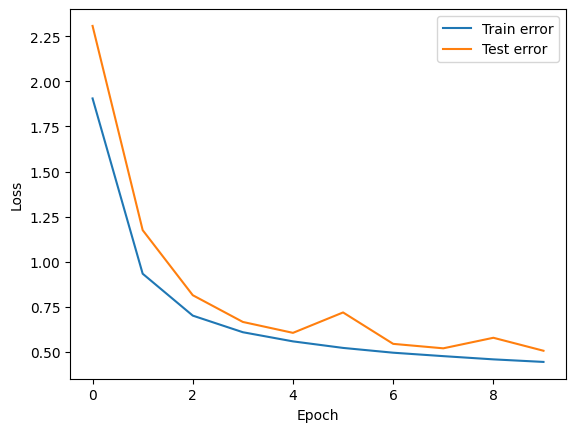

In [10]:
plt.plot(range(10),train_losses, label='Train error')
plt.plot(range(10),test_losses, label='Test error')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
predicted_classes = torch.max(predicted_output, 1)[1] #Isn't perfect
print('Predicted:', predicted_classes)
print('Labels:', labels)

Predicted: tensor([0, 3, 7, 1, 9, 8, 4, 3, 0, 2, 5, 6, 9, 0, 9, 2, 1, 1, 9, 7, 6, 8, 2, 2,
        0, 3, 2, 0, 7, 4, 7, 0])
Labels: tensor([6, 3, 7, 1, 9, 8, 4, 3, 0, 2, 5, 0, 9, 0, 9, 6, 1, 1, 7, 7, 6, 8, 2, 2,
        0, 3, 4, 0, 7, 4, 7, 0])


In [12]:
i = 30
j = 20
k = 10

Predicted: 7
Labels: 7


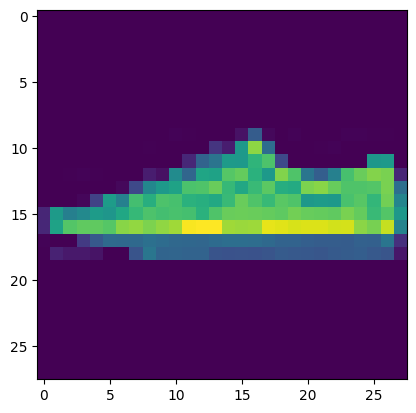

In [13]:
print('Predicted:', predicted_classes[i].item())
print('Labels:', labels[i].item())
plt.imshow(images[i].squeeze().cpu()) # Visualize iamge
plt.show()

The prediction for item 30 is correct since it was categorized as a shoe and it is predicted to be a shoe.

Predicted: 6
Labels: 6


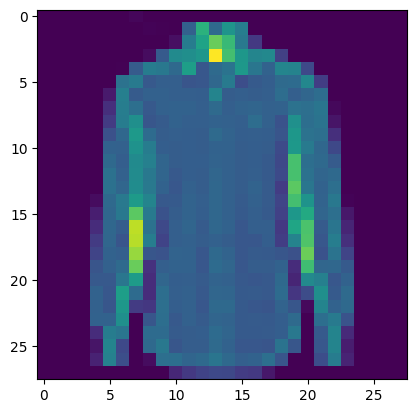

In [17]:
print('Predicted:', predicted_classes[j].item())
print('Labels:', labels[j].item())
plt.imshow(images[j].squeeze().cpu()) # Visualize iamge
plt.show()

The prediction for item 20 is correct since it was categorized as a shirt and it is predicted to be a shirt.

Predicted: 5
Labels: 5


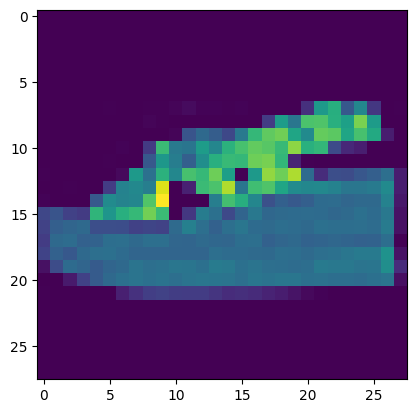

In [18]:
print('Predicted:', predicted_classes[k].item())
print('Labels:', labels[k].item())
plt.imshow(images[k].squeeze().cpu()) # Visualize iamge
plt.show()

The prediction for item 10 is correct since although I do not know what it is.

Predicted: 3
Labels: 3


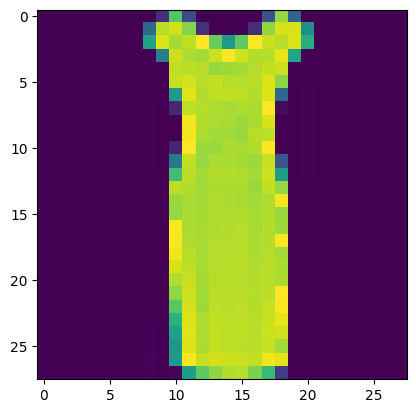

In [20]:
x = 1
print('Predicted:', predicted_classes[x].item())
print('Labels:', labels[x].item())
plt.imshow(images[x].squeeze().cpu()) # Visualize iamge
plt.show()

The prediction for item 1 is correct since it was categorized as a dress and it is predicted to be a dress.